## Vamos a generar una piramide de poblacion, importando los datos desde INE, y generando el gráfico con matplotlib

Empezamos importando las librerias necesarias : 

In [130]:
import matplotlib

In [131]:
#from plotly.graph_objs import *

In [132]:
import matplotlib.pyplot as plt

In [133]:
import pandas as pd

In [134]:
import numpy as np

In [135]:
import plotly.graph_objs as go

In [136]:
import plotly.plotly as py

In [137]:
import datetime, requests

con esta lineas le pedimos a matplotlib que nos presente los graficos en este notebook

In [138]:
%matplotlib inline

Generamos un par de plantillas para facilitar la generacion de la URL para atacar el webservice del INE

In [139]:
url_plantilla_Serie = 'http://servicios.ine.es/wstempus/js/ES/DATOS_SERIE/{codigo}?nult={num_datos}'

In [140]:
url_plantilla_Tabla= 'http://servicios.ine.es/wstempus/js/ES/DATOS_TABLA/{codigo}?nult={num_datos}'

En la siguientes lineas se define el código de la query a descargar y el número  de datos que refiere al numero de periodos. Estamos trabajando con un tipo de datos disponible desde el año 200, con dos publicaciones por año, luego con 30/35 seria suficiente..aun asi empece a usar 100 y así lo deje..

In [151]:
codigo = "9663"

In [152]:
num_datos=100

Preparamos el string con el URL correcto con el que solicitar los datos a través del web service de www.ine.es

In [153]:
url = url_plantilla_Tabla.format(codigo=codigo,num_datos=num_datos)

Con la plantilla ya preparada solicitamos la informacion 

In [154]:
respuesta_poblacion = requests.get(url)

Ya la tenemos, y preparamos un pandas con la respuesta en formato json. Seguro que se puede utilizar otros muchos formatos, yo he decidido empezar por json, cuando tenga suficiente destreza probaré con otros formatos.

In [155]:
datos_poblacion=pd.DataFrame(respuesta_poblacion.json())

Jugemos un poco para entender la estructura de la información descargada...

In [156]:
datos_poblacion.loc[[2]]

,COD,Data,FK_Escala,FK_Unidad,Nombre
2,CP300334,"[{'Fecha': 1483225200000, 'FK_TipoDato': 2, 'F...",1,3,Total Nacional. Todas las edades. Mujeres. Pob...


In [157]:
datos_poblacion.columns

Index(['COD', 'Data', 'FK_Escala', 'FK_Unidad', 'Nombre'], dtype='object')

In [158]:
len(datos_poblacion)

324

Vemos que tenemos 324 series de datos...veamos ahora que hay las tres columnas que mas nos importan : COD: como código de esa tabla especifica, Data : campo de datos con los valores correspondientes a esa tabla desde 2002 hasta 2017 y Nombre : nombre de la tabla..

In [159]:
datos_poblacion[['COD','Nombre']]

,COD,Nombre
0,CP335,Total Nacional. Todas las edades. Total. Pobla...
1,CP300335,Total Nacional. Todas las edades. Hombres. Pob...
2,CP300334,Total Nacional. Todas las edades. Mujeres. Pob...
3,CP300333,Total Nacional. 0 años. Total. Población. Núme...
4,CP300332,Total Nacional. 0 años. Hombres. Población. Nú...
5,CP300331,Total Nacional. 0 años. Mujeres. Población. Nú...
6,CP300330,Total Nacional. 1 año. Total. Población. Número.
7,CP300329,Total Nacional. 1 año. Hombres. Población. Núm...
8,CP300328,Total Nacional. 1 año. Mujeres. Población. Núm...
9,CP300327,Total Nacional. 2 años. Total. Población. Núme...


Varios apuntes importantes :
a) En la columna 'Nombre' hay información relevante, pero concatenadas en el string. Tendremos que trabajarla más adelante para extraer esa información. 
b) Las líneas 0,1,2,318,319 y 320 tienen un formato diferente, y no nos dan informacion relevante en este ejercicio asi que he decidido eliminarlas
c) No he incluido la columna Data para facilidad de lectura, aunque podemos ver un ejemplo aqui :

In [160]:
datos_poblacion.drop([0,1,2,318,319,320],inplace=True)

In [161]:
datos_poblacion.loc[[200]]['Data'].values[0]

[{'Anyo': 2017,
  'FK_Periodo': 26,
  'FK_TipoDato': 2,
  'Fecha': 1483225200000,
  'Secreto': False,
  'Valor': 246464.0},
 {'Anyo': 2016,
  'FK_Periodo': 27,
  'FK_TipoDato': 2,
  'Fecha': 1467324000000,
  'Secreto': False,
  'Valor': 244368.0},
 {'Anyo': 2016,
  'FK_Periodo': 26,
  'FK_TipoDato': 1,
  'Fecha': 1451602800000,
  'Secreto': False,
  'Valor': 242277.0},
 {'Anyo': 2015,
  'FK_Periodo': 27,
  'FK_TipoDato': 1,
  'Fecha': 1435701600000,
  'Secreto': False,
  'Valor': 248047.0},
 {'Anyo': 2015,
  'FK_Periodo': 26,
  'FK_TipoDato': 1,
  'Fecha': 1420066800000,
  'Secreto': False,
  'Valor': 254064.0},
 {'Anyo': 2014,
  'FK_Periodo': 27,
  'FK_TipoDato': 1,
  'Fecha': 1404165600000,
  'Secreto': False,
  'Valor': 260274.0},
 {'Anyo': 2014,
  'FK_Periodo': 26,
  'FK_TipoDato': 1,
  'Fecha': 1388530800000,
  'Secreto': False,
  'Valor': 266616.0},
 {'Anyo': 2013,
  'FK_Periodo': 27,
  'FK_TipoDato': 1,
  'Fecha': 1372629600000,
  'Secreto': False,
  'Valor': 255873.0},
 {'Anyo'

La estructura de Data es la de una lista con diccionarios como valores, cada uno de los diccionarios se refiere a un año, en realidad hay dos diccionarios por año correspondientes a las dos publicaciones : Enero y Julio..Las claves de los diccionarios son 'Anyo', FK_Periodo, FK_Tipo_dato, 'Fecha','Secreto' y 'Valor'. La Fecha esta en formato DateTime/TimeStamp, veamos un ejemplo: aqui sacamos al informacion correspondiente al registro #100 y al sexto registro de su 'Data' (indice 5 corresponde a registro sexto) : 

In [162]:
print ('Serie {}\nNombre {}\nAño {}\nFecha {}\nValor {:,.0f}'.format(
                                                    datos_poblacion.loc[[100]]['COD'].values[0],
                                                    datos_poblacion.loc[[100]]['Nombre'].values[0],
                                                    datos_poblacion.loc[[100]]['Data'].values[0][5]['Anyo'],
                                                    datetime.date.fromtimestamp(datos_poblacion.loc[[100]]['Data'].values[0][5]['Fecha']/1000),
                                                    datos_poblacion.loc[[100]]['Data'].values[0][5]['Valor']
                                                )
      )

Serie CP300236
Nombre Total Nacional. 32 años. Hombres. Población. Número. 
Año 2014
Fecha 2014-07-01
Valor 339,003


Esto se lee tal que : la serie CP300236 correspondiente a Total Nacional. 32 añosa Hombre.Poblacion.Numero en su registro sexto , correspondiente al ejercicioo de Julio 2014 nos da una poblacion de 339.003 personas..

y aqui un poco de código para ver por pantalla todos los datos importados. He quitado 3 periodos y he dividido la poblacion por mil para facilitar su vision en pantalla

In [275]:
annyos=list()
for x in datos_poblacion.index:
    print ('\nEdad {} años, genero {}'.format(
           datos_poblacion.loc[[x]]['Nombre'].apply(spliteador_edad).values[0],
           datos_poblacion.loc[[x]]['Nombre'].apply(spliteador_genero).values[0]
          )
          )
    for y in range(0,len(datos_poblacion.loc[[x]]['Data'].values[0])-3):
        if y!=len(datos_poblacion.loc[[x]]['Data'].values[0])-4:
            print ('{:3s} '.format(str(datos_poblacion.loc[[x]]['Data'].values[0][y]['Anyo'])[2:]),end='')   
        else:
            print ('{:3s} '.format(str(datos_poblacion.loc[[x]]['Data'].values[0][y]['Anyo'])[2:]))
    for y in range(0,len(datos_poblacion.loc[[x]]['Data'].values[0])-3):
        print ('{:2.0f} '.format(datos_poblacion.loc[[x]]['Data'].values[0][y]['Valor']/1000),end='')


Edad 0 años, genero Total
17  16  16  15  15  14  14  13  13  12  12  11  11  10  10  09  09  08  08  07  07  06  06  05  05  04  04  03  
408 410 419 418 426 420 425 433 453 462 476 475 484 480 494 503 520 503 494 482 484 472 467 456 455 443 443 429 
Edad 0 años, genero Hombres
17  16  16  15  15  14  14  13  13  12  12  11  11  10  10  09  09  08  08  07  07  06  06  05  05  04  04  03  
210 211 216 216 220 217 219 223 234 238 245 245 250 248 255 261 268 260 255 249 250 243 240 235 235 228 228 221 
Edad 0 años, genero Mujeres
17  16  16  15  15  14  14  13  13  12  12  11  11  10  10  09  09  08  08  07  07  06  06  05  05  04  04  03  
198 199 203 202 206 204 206 210 220 224 231 230 234 232 239 243 251 243 239 233 234 229 227 221 220 214 215 208 
Edad 1 años, genero Total
17  16  16  15  15  14  14  13  13  12  12  11  11  10  10  09  09  08  08  07  07  06  06  05  05  04  04  03  
424 426 430 427 426 439 453 464 476 479 484 489 495 508 521 510 498 494 490 482 474 467 462 455 449 

17  16  16  15  15  14  14  13  13  12  12  11  11  10  10  09  09  08  08  07  07  06  06  05  05  04  04  03  
250 249 248 245 242 238 233 232 232 232 233 229 225 222 219 218 217 214 211 209 208 207 207 210 212 214 217 215 
Edad 11 años, genero Mujeres
17  16  16  15  15  14  14  13  13  12  12  11  11  10  10  09  09  08  08  07  07  06  06  05  05  04  04  03  
237 234 233 231 230 225 221 220 220 219 218 216 214 210 206 206 206 203 201 199 197 196 196 198 201 203 206 203 
Edad 12 años, genero Total
17  16  16  15  15  14  14  13  13  12  12  11  11  10  10  09  09  08  08  07  07  06  06  05  05  04  04  03  
482 477 472 463 454 452 451 451 451 446 441 434 426 426 426 422 418 415 413 411 409 414 419 423 429 424 421 421 
Edad 12 años, genero Hombres
17  16  16  15  15  14  14  13  13  12  12  11  11  10  10  09  09  08  08  07  07  06  06  05  05  04  04  03  
248 245 242 238 233 232 231 232 233 230 226 223 220 219 219 216 214 213 212 211 211 213 216 218 220 218 217 216 
Edad 12 año

444 450 458 464 472 471 472 477 484 491 499 506 513 519 527 536 545 554 561 564 566 568 573 587 597 602 612 623 
Edad 22 años, genero Hombres
17  16  16  15  15  14  14  13  13  12  12  11  11  10  10  09  09  08  08  07  07  06  06  05  05  04  04  03  
227 230 234 237 240 240 241 243 246 250 254 257 260 264 268 273 278 283 287 289 289 291 293 301 306 308 314 319 
Edad 22 años, genero Mujeres
17  16  16  15  15  14  14  13  13  12  12  11  11  10  10  09  09  08  08  07  07  06  06  05  05  04  04  03  
217 220 224 228 232 231 231 234 238 242 246 249 252 255 259 263 267 271 274 276 277 278 280 286 291 294 298 304 
Edad 23 años, genero Total
17  16  16  15  15  14  14  13  13  12  12  11  11  10  10  09  09  08  08  07  07  06  06  05  05  04  04  03  
463 469 476 474 474 477 483 490 500 508 517 523 530 540 550 563 575 585 592 594 594 605 617 627 633 640 652 656 
Edad 23 años, genero Hombres
17  16  16  15  15  14  14  13  13  12  12  11  11  10  10  09  09  08  08  07  07  06  06  05 

612 631 651 669 686 708 730 748 765 788 810 818 825 833 841 839 835 829 820 802 783 773 766 754 739 726 716 705 
Edad 33 años, genero Hombres
17  16  16  15  15  14  14  13  13  12  12  11  11  10  10  09  09  08  08  07  07  06  06  05  05  04  04  03  
305 316 326 336 346 358 369 379 389 403 416 422 426 431 435 435 434 431 426 416 406 401 396 389 381 373 368 361 
Edad 33 años, genero Mujeres
17  16  16  15  15  14  14  13  13  12  12  11  11  10  10  09  09  08  08  07  07  06  06  05  05  04  04  03  
307 316 325 333 341 350 360 368 376 385 394 396 398 402 406 404 401 398 394 386 377 373 369 364 358 353 348 344 
Edad 34 años, genero Total
17  16  16  15  15  14  14  13  13  12  12  11  11  10  10  09  09  08  08  07  07  06  06  05  05  04  04  03  
651 667 683 703 724 739 754 778 802 812 822 831 839 837 835 832 828 814 798 789 779 765 752 743 731 718 709 700 
Edad 34 años, genero Hombres
17  16  16  15  15  14  14  13  13  12  12  11  11  10  10  09  09  08  08  07  07  06  06  05 

775 769 764 760 757 755 754 754 754 758 762 752 742 739 737 741 746 726 706 691 675 663 653 653 652 639 628 619 
Edad 44 años, genero Hombres
17  16  16  15  15  14  14  13  13  12  12  11  11  10  10  09  09  08  08  07  07  06  06  05  05  04  04  03  
394 391 388 387 385 384 383 383 383 385 387 382 377 375 373 376 378 368 357 349 340 334 328 328 327 320 314 309 
Edad 44 años, genero Mujeres
17  16  16  15  15  14  14  13  13  12  12  11  11  10  10  09  09  08  08  07  07  06  06  05  05  04  04  03  
381 378 376 374 372 371 371 371 371 373 375 370 365 364 364 366 368 358 349 342 334 329 325 325 325 319 314 309 
Edad 45 años, genero Total
17  16  16  15  15  14  14  13  13  12  12  11  11  10  10  09  09  08  08  07  07  06  06  05  05  04  04  03  
763 758 754 752 750 749 748 752 757 749 741 739 736 741 746 728 709 696 683 671 659 658 658 647 634 624 615 606 
Edad 45 años, genero Hombres
17  16  16  15  15  14  14  13  13  12  12  11  11  10  10  09  09  08  08  07  07  06  06  05 

17  16  16  15  15  14  14  13  13  12  12  11  11  10  10  09  09  08  08  07  07  06  06  05  05  04  04  03  
328 329 330 326 322 319 316 313 311 301 291 287 283 277 271 271 270 269 268 260 251 248 245 250 255 261 266 254 
Edad 56 años, genero Total
17  16  16  15  15  14  14  13  13  12  12  11  11  10  10  09  09  08  08  07  07  06  06  05  05  04  04  03  
652 643 635 629 623 616 610 591 572 565 558 545 532 533 534 533 532 515 498 491 485 494 503 514 526 502 478 467 
Edad 56 años, genero Hombres
17  16  16  15  15  14  14  13  13  12  12  11  11  10  10  09  09  08  08  07  07  06  06  05  05  04  04  03  
322 318 314 311 308 304 301 292 282 279 275 269 262 263 264 264 264 255 245 242 239 243 246 252 258 246 235 229 
Edad 56 años, genero Mujeres
17  16  16  15  15  14  14  13  13  12  12  11  11  10  10  09  09  08  08  07  07  06  06  05  05  04  04  03  
330 326 321 318 315 312 309 299 290 286 282 276 271 270 270 269 269 261 252 249 246 251 256 262 268 255 243 238 
Edad 57 año

479 491 504 483 463 454 445 456 468 458 449 446 444 415 386 372 358 399 442 370 297 318 339 360 382 402 423 417 
Edad 67 años, genero Hombres
17  16  16  15  15  14  14  13  13  12  12  11  11  10  10  09  09  08  08  07  07  06  06  05  05  04  04  03  
227 234 240 230 221 216 211 217 222 218 213 212 211 197 184 177 170 190 209 174 139 149 159 169 179 187 196 194 
Edad 67 años, genero Mujeres
17  16  16  15  15  14  14  13  13  12  12  11  11  10  10  09  09  08  08  07  07  06  06  05  05  04  04  03  
252 258 264 253 243 238 234 240 246 241 235 234 233 217 202 194 187 210 232 195 158 169 180 191 202 215 227 223 
Edad 68 años, genero Total
17  16  16  15  15  14  14  13  13  12  12  11  11  10  10  09  09  08  08  07  07  06  06  05  05  04  04  03  
499 478 458 449 441 452 463 453 444 442 440 411 382 368 354 396 438 366 295 315 336 357 379 399 419 414 408 408 
Edad 68 años, genero Hombres
17  16  16  15  15  14  14  13  13  12  12  11  11  10  10  09  09  08  08  07  07  06  06  05 

17  16  16  15  15  14  14  13  13  12  12  11  11  10  10  09  09  08  08  07  07  06  06  05  05  04  04  03  
279 296 314 329 346 341 337 337 337 341 347 346 345 336 329 330 332 323 315 313 313 303 294 294 296 289 282 280 
Edad 78 años, genero Hombres
17  16  16  15  15  14  14  13  13  12  12  11  11  10  10  09  09  08  08  07  07  06  06  05  05  04  04  03  
120 127 135 141 147 146 145 144 144 146 148 147 146 143 140 139 139 135 132 131 130 126 122 122 122 119 116 115 
Edad 78 años, genero Mujeres
17  16  16  15  15  14  14  13  13  12  12  11  11  10  10  09  09  08  08  07  07  06  06  05  05  04  04  03  
158 168 178 188 198 195 193 192 193 196 199 199 198 193 189 191 193 188 183 183 183 177 172 172 174 170 167 166 
Edad 79 años, genero Total
17  16  16  15  15  14  14  13  13  12  12  11  11  10  10  09  09  08  08  07  07  06  06  05  05  04  04  03  
304 319 334 330 326 326 325 330 335 333 333 325 317 318 320 311 303 302 301 292 283 283 284 277 271 269 267 263 
Edad 79 año

17  16  16  15  15  14  14  13  13  12  12  11  11  10  10  09  09  08  08  07  07  06  06  05  05  04  04  03  
89 88 88 86 84 83 82 80 79 78 78 74 70 69 67 62 57 57 57 56 54 53 52 51 52 51 51 51 
Edad 90 años, genero Total
17  16  16  15  15  14  14  13  13  12  12  11  11  10  10  09  09  08  08  07  07  06  06  05  05  04  04  03  
115 112 108 106 106 104 102 100 98 94 91 87 84 78 71 70 70 68 66 64 63 63 62 62 62 61 60 60 
Edad 90 años, genero Hombres
17  16  16  15  15  14  14  13  13  12  12  11  11  10  10  09  09  08  08  07  07  06  06  05  05  04  04  03  
37 36 34 33 33 32 32 31 30 29 28 27 25 23 21 20 20 19 19 18 18 18 18 18 18 17 17 17 
Edad 90 años, genero Mujeres
17  16  16  15  15  14  14  13  13  12  12  11  11  10  10  09  09  08  08  07  07  06  06  05  05  04  04  03  
78 76 74 73 73 71 70 69 68 65 62 61 59 55 50 50 50 48 47 46 45 45 44 44 45 44 43 43 
Edad 91 años, genero Total
17  16  16  15  15  14  14  13  13  12  12  11  11  10  10  09  09  08  08  07  07  06  

TypeError: unsupported operand type(s) for /: 'NoneType' and 'int'

Empezemos pues a trabajar los datos para poder generar la Piramide buscada...

En primer lugar generamos un par de funciones auxiliares para poder trabajar el campo 'nombre, que como hemos visto lleva contenadas informacion relevante sobre  el tipo de tabla, la edad, y el género (Hombre/Mujer/Total)

In [163]:
spliteador_edad = lambda x: x.split('.')[1].split()[0]

In [164]:
spliteador_genero=lambda x: x.split('.')[2].strip()

In [165]:
spliteador_edad_genero=lambda x: [x.split('.')[1].split()[0],x.split('.')[2].strip()]

A continuacion vamos a definir un pandas filtrando los valores correspondientes a Genero = Hombre o Mujer, ,es decir Genero diferente de Total ---> !='Total'. Definiremos entonces un par de listas, una para 'Hombres' y orta para 'Mujeres', cada elemnto de esas listas contendra a su vez dos campos : edad y valor (población). Me costó llegar a esa lista definida de forma comprensiva, es lo más "pythonico" que he conseguido escribir, pero seguro que hay maneras más elegantes. Posterioremente definimos un par de pandas que "merge" en uno solo que llamamos panda_poblacion. En este tendremos tres columnas : 'Edad', 'Hombres', 'Mujeres'..y estaremos listos para dibujar las gráficas.

In [166]:
df1=datos_poblacion[datos_poblacion['Nombre'].apply(spliteador_genero)!='Total']

In [167]:
dict_poblacion=[[df1.loc[[x]]['Nombre'].apply(spliteador_genero).values[0],int(df1.loc[[x]]['Nombre'].apply(spliteador_edad).values[0]),z['Valor']]
                   for x in df1.index for z in df1.loc[[x]]['Data'].values[0] if z['Anyo']==2017]

In [168]:
lista_hombres=[[int(df1.loc[[x]]['Nombre'].apply(spliteador_edad).values[0]),z['Valor']] 
for x in df1.index if df1.loc[[x]]['Nombre'].apply(spliteador_genero).values[0]=='Hombres' 
for z in df1.loc[[x]]['Data'].values[0] if z['Anyo']==2017]

In [169]:
lista_mujeres=[[int(df1.loc[[x]]['Nombre'].apply(spliteador_edad).values[0]),z['Valor']] 
for x in df1.index if df1.loc[[x]]['Nombre'].apply(spliteador_genero).values[0]=='Mujeres' 
for z in df1.loc[[x]]['Data'].values[0] if z['Anyo']==2017]

In [170]:
panda_hombres=pd.DataFrame(lista_hombres,columns=['Edad','Hombres'])
panda_mujeres=pd.DataFrame(lista_mujeres,columns=['Edad','Mujeres'])

In [171]:
panda_poblacion=pd.merge(panda_hombres,panda_mujeres,on='Edad')

Hacemos un primer intento con una grafica clasica de lineas en la que pintamos poblacion separada de Mujeres y Hombres en función de la edad.

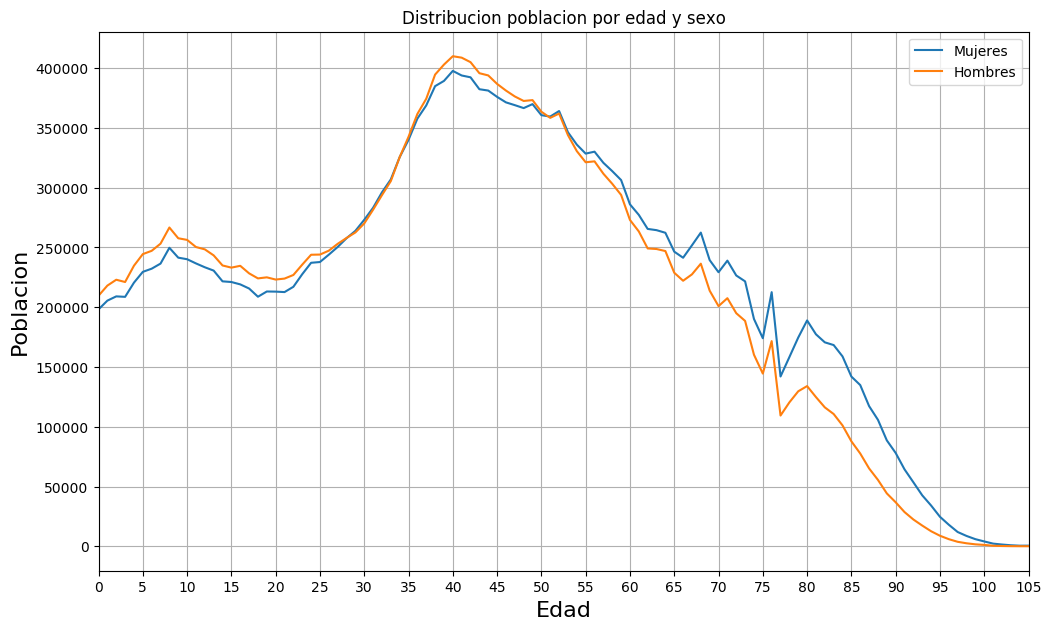

In [201]:
plt.plot(panda_poblacion['Edad'],panda_poblacion['Mujeres'],
         panda_poblacion['Edad'],panda_poblacion['Hombres'])
plt.xlim([0,105])
plt.locator_params(axis='x',nbins=25)
plt.locator_params(axis='y',nbins=10)
plt.xlabel('Edad',size=16)
plt.ylabel('Poblacion',size=16)
plt.grid()
plt.legend(['Mujeres','Hombres'])
plt.title('Distribucion poblacion por edad y sexo')

..y la gráfica con población total : 

([<matplotlib.axis.XTick at 0x118d562b0>,
 <a list of 11 Text xticklabel objects>)

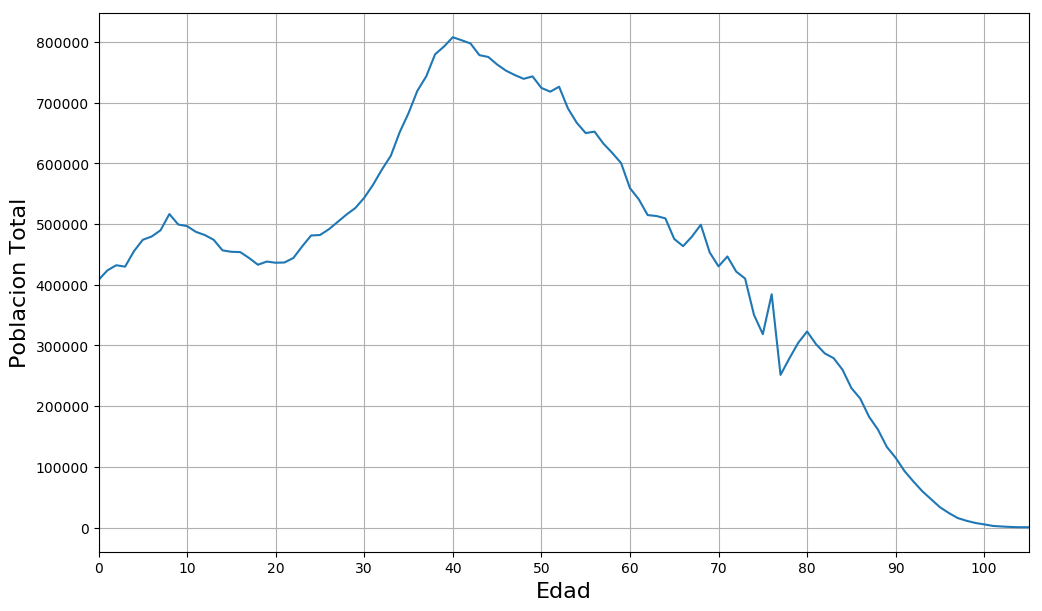

In [202]:
plt.plot(panda_poblacion['Edad'],panda_poblacion['Hombres']+panda_poblacion['Mujeres'])
plt.xlim([0,105])
plt.locator_params(axis='x',nbins=25)
plt.locator_params(axis='y',nbins=10)
plt.xlabel('Edad',size=16)
plt.ylabel('Poblacion Total',size=16)
plt.grid()
plt.xticks([0,10,20,30,40,50,60,70,80,90,100],['0','10','20','30','40','50','60','70','80','90','100'])

Como curiosidad saquemos la edad en la que hay mayor población :

In [207]:
panda_poblacion.loc[[panda_poblacion['Hombres'].idxmax()]]

,Edad,Hombres,Mujeres
40,40,409914.0,397629.0


In [210]:
panda_poblacion.loc[[panda_poblacion['Mujeres'].idxmax()]]

,Edad,Hombres,Mujeres
40,40,409914.0,397629.0


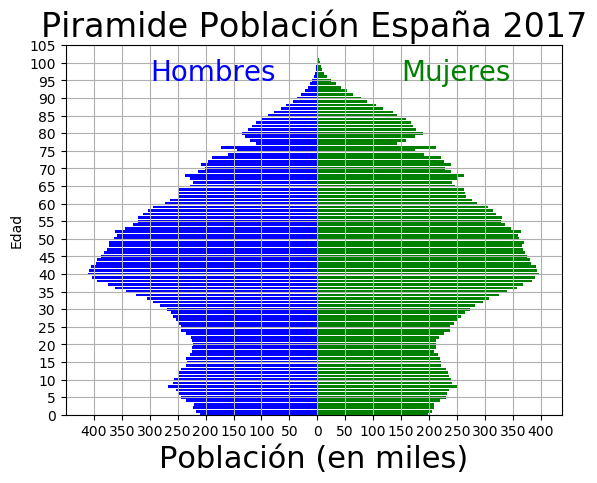

In [216]:
plt.rcdefaults()
fig,ax = plt.subplots()
y_pos = panda_poblacion['Edad']
ax.barh(y_pos, panda_poblacion['Mujeres'], align='center',
        color='green', ecolor='black')
ax.barh(y_pos,-panda_poblacion['Hombres'],align='center',color='blue',ecolor='black')
ax.set_yticks(y_pos)
ax.set_xticks([-400000,-350000,-300000,-250000,-200000,-150000,-100000,-50000,0,
               50000,100000,150000,200000,250000,300000,350000,400000,])
ax.set_xticklabels(['400','350','300','250','200','150','100','50','0'
                    ,'50','100','150','200','250','300','350','400'])
#ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('Población (en miles)',size=22)
ax.set_ylabel('Edad')
ax.locator_params(axis='y',nbins=25)
plt.ylim(0,105)
ax.set_title('Piramide Población España 2017',size=24)
ax.grid(True)
plt.text(150000, 95, 'Mujeres',color='green',size=20)
plt.text(-300000,95,'Hombres',color='blue',size=20)
plt.rcParams["figure.figsize"]=[12,7]
plt.show()

Edad 0 años, genero Total
Año 2017, poblacion 407793.0
Año 2016, poblacion 409746.0
Año 2016, poblacion 419395.0
Año 2015, poblacion 418019.0
Año 2015, poblacion 426459.0
Año 2014, poblacion 420420.0
Año 2014, poblacion 424881.0
Año 2013, poblacion 433415.0
Año 2013, poblacion 453294.0
Año 2012, poblacion 461973.0
Año 2012, poblacion 475603.0
Año 2011, poblacion 474723.0
Año 2011, poblacion 484004.0
Año 2010, poblacion 479828.0
Año 2010, poblacion 493974.0
Año 2009, poblacion 503462.0
Año 2009, poblacion 519525.0
Año 2008, poblacion 503135.0
Año 2008, poblacion 493918.0
Año 2007, poblacion 482498.0
Año 2007, poblacion 483683.0
Año 2006, poblacion 472009.0
Año 2006, poblacion 466984.0
Año 2005, poblacion 456377.0
Año 2005, poblacion 455204.0
Año 2004, poblacion 442767.0
Año 2004, poblacion 443076.0
Año 2003, poblacion 429164.0
Año 2003, poblacion 419433.0
Año 2002, poblacion 409528.0
Año 2002, poblacion 411693.0
Edad 0 años, genero Hombres
Año 2017, poblacion 209617.0
Año 2016, poblacio

Año 2007, poblacion 236675.0
Año 2006, poblacion 230388.0
Año 2006, poblacion 224345.0
Año 2005, poblacion 221812.0
Año 2005, poblacion 219513.0
Año 2004, poblacion 216277.0
Año 2004, poblacion 212962.0
Año 2003, poblacion 207701.0
Año 2003, poblacion 201785.0
Año 2002, poblacion 197024.0
Año 2002, poblacion 192270.0
Edad 3 años, genero Mujeres
Año 2017, poblacion 208665.0
Año 2016, poblacion 214063.0
Año 2016, poblacion 219765.0
Año 2015, poblacion 224228.0
Año 2015, poblacion 228890.0
Año 2014, poblacion 230462.0
Año 2014, poblacion 232165.0
Año 2013, poblacion 235001.0
Año 2013, poblacion 237960.0
Año 2012, poblacion 245011.0
Año 2012, poblacion 252034.0
Año 2011, poblacion 247411.0
Año 2011, poblacion 242700.0
Año 2010, poblacion 241596.0
Año 2010, poblacion 240459.0
Año 2009, poblacion 237994.0
Año 2009, poblacion 235513.0
Año 2008, poblacion 233173.0
Año 2008, poblacion 230352.0
Año 2007, poblacion 227593.0
Año 2007, poblacion 224683.0
Año 2006, poblacion 218135.0
Año 2006, pobla

Año 2009, poblacion 219844.0
Año 2008, poblacion 218853.0
Año 2008, poblacion 217736.0
Año 2007, poblacion 214096.0
Año 2007, poblacion 210193.0
Año 2006, poblacion 205888.0
Año 2006, poblacion 201868.0
Año 2005, poblacion 196876.0
Año 2005, poblacion 192261.0
Año 2004, poblacion 190552.0
Año 2004, poblacion 188995.0
Año 2003, poblacion 186163.0
Año 2003, poblacion 183083.0
Año 2002, poblacion 181540.0
Año 2002, poblacion 180309.0
Edad 7 años, genero Total
Año 2017, poblacion 489613.0
Año 2016, poblacion 502286.0
Año 2016, poblacion 515810.0
Año 2015, poblacion 506875.0
Año 2015, poblacion 498243.0
Año 2014, poblacion 496710.0
Año 2014, poblacion 495565.0
Año 2013, poblacion 491027.0
Año 2013, poblacion 486932.0
Año 2012, poblacion 484808.0
Año 2012, poblacion 482425.0
Año 2011, poblacion 477676.0
Año 2011, poblacion 473199.0
Año 2010, poblacion 463502.0
Año 2010, poblacion 453930.0
Año 2009, poblacion 451806.0
Año 2009, poblacion 449677.0
Año 2008, poblacion 445958.0
Año 2008, poblaci

Año 2005, poblacion 396815.0
Año 2005, poblacion 396609.0
Año 2004, poblacion 401569.0
Año 2004, poblacion 407175.0
Año 2003, poblacion 411459.0
Año 2003, poblacion 415433.0
Año 2002, poblacion 409885.0
Año 2002, poblacion 404988.0
Edad 10 años, genero Hombres
Año 2017, poblacion 256299.0
Año 2016, poblacion 252731.0
Año 2016, poblacion 249630.0
Año 2015, poblacion 248436.0
Año 2015, poblacion 247620.0
Año 2014, poblacion 244852.0
Año 2014, poblacion 242314.0
Año 2013, poblacion 237981.0
Año 2013, poblacion 233959.0
Año 2012, poblacion 232909.0
Año 2012, poblacion 231822.0
Año 2011, poblacion 232079.0
Año 2011, poblacion 232277.0
Año 2010, poblacion 228357.0
Año 2010, poblacion 224531.0
Año 2009, poblacion 221173.0
Año 2009, poblacion 217683.0
Año 2008, poblacion 215891.0
Año 2008, poblacion 213839.0
Año 2007, poblacion 210086.0
Año 2007, poblacion 206758.0
Año 2006, poblacion 205215.0
Año 2006, poblacion 204247.0
Año 2005, poblacion 203942.0
Año 2005, poblacion 203923.0
Año 2004, pobl

Edad 13 años, genero Mujeres
Año 2017, poblacion 230609.0
Año 2016, poblacion 225579.0
Año 2016, poblacion 220902.0
Año 2015, poblacion 220150.0
Año 2015, poblacion 219669.0
Año 2014, poblacion 218567.0
Año 2014, poblacion 217723.0
Año 2013, poblacion 216097.0
Año 2013, poblacion 214528.0
Año 2012, poblacion 210747.0
Año 2012, poblacion 206996.0
Año 2011, poblacion 207651.0
Año 2011, poblacion 208391.0
Año 2010, poblacion 206804.0
Año 2010, poblacion 205316.0
Año 2009, poblacion 204294.0
Año 2009, poblacion 203288.0
Año 2008, poblacion 202980.0
Año 2008, poblacion 202577.0
Año 2007, poblacion 204452.0
Año 2007, poblacion 206685.0
Año 2006, poblacion 208818.0
Año 2006, poblacion 211538.0
Año 2005, poblacion 209066.0
Año 2005, poblacion 206983.0
Año 2004, poblacion 207347.0
Año 2004, poblacion 208090.0
Año 2003, poblacion 208592.0
Año 2003, poblacion 208978.0
Año 2002, poblacion 208510.0
Año 2002, poblacion 208209.0
Edad 14 años, genero Total
Año 2017, poblacion 456540.0
Año 2016, poblac

Año 2015, poblacion 429398.0
Año 2015, poblacion 430209.0
Año 2014, poblacion 427877.0
Año 2014, poblacion 425640.0
Año 2013, poblacion 425384.0
Año 2013, poblacion 425121.0
Año 2012, poblacion 428113.0
Año 2012, poblacion 430624.0
Año 2011, poblacion 438526.0
Año 2011, poblacion 446188.0
Año 2010, poblacion 453488.0
Año 2010, poblacion 460327.0
Año 2009, poblacion 458901.0
Año 2009, poblacion 456417.0
Año 2008, poblacion 457338.0
Año 2008, poblacion 456921.0
Año 2007, poblacion 458329.0
Año 2007, poblacion 458671.0
Año 2006, poblacion 458888.0
Año 2006, poblacion 459282.0
Año 2005, poblacion 459749.0
Año 2005, poblacion 459840.0
Año 2004, poblacion 462480.0
Año 2004, poblacion 465850.0
Año 2003, poblacion 472270.0
Año 2003, poblacion 478119.0
Año 2002, poblacion 483968.0
Año 2002, poblacion 489406.0
Edad 17 años, genero Hombres
Año 2017, poblacion 228314.0
Año 2016, poblacion 224976.0
Año 2016, poblacion 221809.0
Año 2015, poblacion 221438.0
Año 2015, poblacion 221219.0
Año 2014, pobl

Año 2017, poblacion 223119.0
Año 2016, poblacion 222203.0
Año 2016, poblacion 221752.0
Año 2015, poblacion 222534.0
Año 2015, poblacion 223703.0
Año 2014, poblacion 227507.0
Año 2014, poblacion 231785.0
Año 2013, poblacion 236204.0
Año 2013, poblacion 240917.0
Año 2012, poblacion 241439.0
Año 2012, poblacion 242042.0
Año 2011, poblacion 243254.0
Año 2011, poblacion 244667.0
Año 2010, poblacion 247648.0
Año 2010, poblacion 251021.0
Año 2009, poblacion 254405.0
Año 2009, poblacion 257662.0
Año 2008, poblacion 260031.0
Año 2008, poblacion 260817.0
Año 2007, poblacion 260798.0
Año 2007, poblacion 259475.0
Año 2006, poblacion 261498.0
Año 2006, poblacion 264624.0
Año 2005, poblacion 268255.0
Año 2005, poblacion 270363.0
Año 2004, poblacion 271382.0
Año 2004, poblacion 274433.0
Año 2003, poblacion 280862.0
Año 2003, poblacion 286636.0
Año 2002, poblacion 291253.0
Año 2002, poblacion 295231.0
Edad 20 años, genero Mujeres
Año 2017, poblacion 213028.0
Año 2016, poblacion 210926.0
Año 2016, pobl

Año 2012, poblacion 251297.0
Año 2012, poblacion 255690.0
Año 2011, poblacion 258374.0
Año 2011, poblacion 261763.0
Año 2010, poblacion 266157.0
Año 2010, poblacion 271136.0
Año 2009, poblacion 276327.0
Año 2009, poblacion 281209.0
Año 2008, poblacion 285790.0
Año 2008, poblacion 289313.0
Año 2007, poblacion 290341.0
Año 2007, poblacion 290668.0
Año 2006, poblacion 295130.0
Año 2006, poblacion 300701.0
Año 2005, poblacion 305015.0
Año 2005, poblacion 308182.0
Año 2004, poblacion 312349.0
Año 2004, poblacion 318328.0
Año 2003, poblacion 320332.0
Año 2003, poblacion 321772.0
Año 2002, poblacion 325676.0
Año 2002, poblacion 329163.0
Edad 24 años, genero Total
Año 2017, poblacion 481022.0
Año 2016, poblacion 478032.0
Año 2016, poblacion 476731.0
Año 2015, poblacion 479556.0
Año 2015, poblacion 483744.0
Año 2014, poblacion 489766.0
Año 2014, poblacion 497608.0
Año 2013, poblacion 506111.0
Año 2013, poblacion 516666.0
Año 2012, poblacion 525437.0
Año 2012, poblacion 534183.0
Año 2011, poblac

Año 2014, poblacion 272394.0
Año 2013, poblacion 280759.0
Año 2013, poblacion 290031.0
Año 2012, poblacion 299226.0
Año 2012, poblacion 308023.0
Año 2011, poblacion 315846.0
Año 2011, poblacion 323880.0
Año 2010, poblacion 336019.0
Año 2010, poblacion 348405.0
Año 2009, poblacion 358634.0
Año 2009, poblacion 368375.0
Año 2008, poblacion 377130.0
Año 2008, poblacion 383551.0
Año 2007, poblacion 384066.0
Año 2007, poblacion 383593.0
Año 2006, poblacion 388719.0
Año 2006, poblacion 394994.0
Año 2005, poblacion 395190.0
Año 2005, poblacion 392114.0
Año 2004, poblacion 388964.0
Año 2004, poblacion 389089.0
Año 2003, poblacion 384204.0
Año 2003, poblacion 378898.0
Año 2002, poblacion 371358.0
Año 2002, poblacion 362987.0
Edad 27 años, genero Mujeres
Año 2017, poblacion 250372.0
Año 2016, poblacion 252531.0
Año 2016, poblacion 255678.0
Año 2015, poblacion 258507.0
Año 2015, poblacion 261977.0
Año 2014, poblacion 267173.0
Año 2014, poblacion 273053.0
Año 2013, poblacion 279976.0
Año 2013, pobl

Año 2016, poblacion 293962.0
Año 2015, poblacion 300652.0
Año 2015, poblacion 307664.0
Año 2014, poblacion 319668.0
Año 2014, poblacion 332013.0
Año 2013, poblacion 344326.0
Año 2013, poblacion 357162.0
Año 2012, poblacion 370326.0
Año 2012, poblacion 383367.0
Año 2011, poblacion 391206.0
Año 2011, poblacion 398672.0
Año 2010, poblacion 410309.0
Año 2010, poblacion 421852.0
Año 2009, poblacion 426366.0
Año 2009, poblacion 430251.0
Año 2008, poblacion 432108.0
Año 2008, poblacion 432378.0
Año 2007, poblacion 426437.0
Año 2007, poblacion 419613.0
Año 2006, poblacion 413117.0
Año 2006, poblacion 407557.0
Año 2005, poblacion 399738.0
Año 2005, poblacion 389607.0
Año 2004, poblacion 382723.0
Año 2004, poblacion 377960.0
Año 2003, poblacion 370541.0
Año 2003, poblacion 362951.0
Año 2002, poblacion 355932.0
Año 2002, poblacion 348080.0
Edad 31 años, genero Mujeres
Año 2017, poblacion 283165.0
Año 2016, poblacion 288956.0
Año 2016, poblacion 295340.0
Año 2015, poblacion 300961.0
Año 2015, pobl

Año 2014, poblacion 790450.0
Año 2013, poblacion 801799.0
Año 2013, poblacion 813391.0
Año 2012, poblacion 825421.0
Año 2012, poblacion 836295.0
Año 2011, poblacion 834929.0
Año 2011, poblacion 832656.0
Año 2010, poblacion 830409.0
Año 2010, poblacion 827660.0
Año 2009, poblacion 817072.0
Año 2009, poblacion 805522.0
Año 2008, poblacion 800926.0
Año 2008, poblacion 794162.0
Año 2007, poblacion 780142.0
Año 2007, poblacion 764980.0
Año 2006, poblacion 754078.0
Año 2006, poblacion 744364.0
Año 2005, poblacion 734980.0
Año 2005, poblacion 723476.0
Año 2004, poblacion 713031.0
Año 2004, poblacion 705260.0
Año 2003, poblacion 701708.0
Año 2003, poblacion 698022.0
Año 2002, poblacion 685733.0
Año 2002, poblacion 673199.0
Edad 35 años, genero Hombres
Año 2017, poblacion 342509.0
Año 2016, poblacion 352503.0
Año 2016, poblacion 362773.0
Año 2015, poblacion 370542.0
Año 2015, poblacion 378174.0
Año 2014, poblacion 390425.0
Año 2014, poblacion 403003.0
Año 2013, poblacion 410350.0
Año 2013, pobl

Año 2002, poblacion 328982.0
Edad 38 años, genero Mujeres
Año 2017, poblacion 384886.0
Año 2016, poblacion 386831.0
Año 2016, poblacion 389143.0
Año 2015, poblacion 393674.0
Año 2015, poblacion 398364.0
Año 2014, poblacion 397429.0
Año 2014, poblacion 396589.0
Año 2013, poblacion 397105.0
Año 2013, poblacion 397694.0
Año 2012, poblacion 393604.0
Año 2012, poblacion 388991.0
Año 2011, poblacion 388264.0
Año 2011, poblacion 387316.0
Año 2010, poblacion 384226.0
Año 2010, poblacion 381005.0
Año 2009, poblacion 378319.0
Año 2009, poblacion 375374.0
Año 2008, poblacion 372701.0
Año 2008, poblacion 369342.0
Año 2007, poblacion 365680.0
Año 2007, poblacion 361586.0
Año 2006, poblacion 360311.0
Año 2006, poblacion 359807.0
Año 2005, poblacion 354112.0
Año 2005, poblacion 348326.0
Año 2004, poblacion 345625.0
Año 2004, poblacion 343649.0
Año 2003, poblacion 344564.0
Año 2003, poblacion 345435.0
Año 2002, poblacion 335019.0
Año 2002, poblacion 324445.0
Edad 39 años, genero Total
Año 2017, poblac

Año 2011, poblacion 374353.0
Año 2010, poblacion 372993.0
Año 2010, poblacion 371463.0
Año 2009, poblacion 372611.0
Año 2009, poblacion 373407.0
Año 2008, poblacion 367487.0
Año 2008, poblacion 361235.0
Año 2007, poblacion 358821.0
Año 2007, poblacion 356143.0
Año 2006, poblacion 356791.0
Año 2006, poblacion 357859.0
Año 2005, poblacion 347948.0
Año 2005, poblacion 337669.0
Año 2004, poblacion 330585.0
Año 2004, poblacion 324220.0
Año 2003, poblacion 319556.0
Año 2003, poblacion 314938.0
Año 2002, poblacion 314602.0
Año 2002, poblacion 314130.0
Edad 42 años, genero Total
Año 2017, poblacion 797212.0
Año 2016, poblacion 788280.0
Año 2016, poblacion 779976.0
Año 2015, poblacion 779797.0
Año 2015, poblacion 780073.0
Año 2014, poblacion 775523.0
Año 2014, poblacion 771101.0
Año 2013, poblacion 769625.0
Año 2013, poblacion 768529.0
Año 2012, poblacion 767509.0
Año 2012, poblacion 765406.0
Año 2011, poblacion 763361.0
Año 2011, poblacion 760698.0
Año 2010, poblacion 762150.0
Año 2010, poblac

Año 2013, poblacion 383340.0
Año 2012, poblacion 379763.0
Año 2012, poblacion 375921.0
Año 2011, poblacion 374247.0
Año 2011, poblacion 372341.0
Año 2010, poblacion 374685.0
Año 2010, poblacion 377001.0
Año 2009, poblacion 368017.0
Año 2009, poblacion 358747.0
Año 2008, poblacion 351917.0
Año 2008, poblacion 344435.0
Año 2007, poblacion 337944.0
Año 2007, poblacion 331209.0
Año 2006, poblacion 330563.0
Año 2006, poblacion 330322.0
Año 2005, poblacion 324383.0
Año 2005, poblacion 317807.0
Año 2004, poblacion 312379.0
Año 2004, poblacion 307746.0
Año 2003, poblacion 302556.0
Año 2003, poblacion 297400.0
Año 2002, poblacion 285978.0
Año 2002, poblacion 274542.0
Edad 45 años, genero Mujeres
Año 2017, poblacion 375913.0
Año 2016, poblacion 373469.0
Año 2016, poblacion 371341.0
Año 2015, poblacion 370507.0
Año 2015, poblacion 369953.0
Año 2014, poblacion 369246.0
Año 2014, poblacion 368687.0
Año 2013, poblacion 371206.0
Año 2013, poblacion 373861.0
Año 2012, poblacion 369668.0
Año 2012, pobl

Año 2003, poblacion 267673.0
Año 2003, poblacion 261088.0
Año 2002, poblacion 259993.0
Año 2002, poblacion 258917.0
Edad 49 años, genero Total
Año 2017, poblacion 743052.0
Año 2016, poblacion 734186.0
Año 2016, poblacion 725755.0
Año 2015, poblacion 723732.0
Año 2015, poblacion 722090.0
Año 2014, poblacion 728038.0
Año 2014, poblacion 734348.0
Año 2013, poblacion 718937.0
Año 2013, poblacion 703717.0
Año 2012, poblacion 693703.0
Año 2012, poblacion 683535.0
Año 2011, poblacion 675681.0
Año 2011, poblacion 667591.0
Año 2010, poblacion 669580.0
Año 2010, poblacion 671725.0
Año 2009, poblacion 662504.0
Año 2009, poblacion 653314.0
Año 2008, poblacion 645328.0
Año 2008, poblacion 636878.0
Año 2007, poblacion 626711.0
Año 2007, poblacion 616052.0
Año 2006, poblacion 593359.0
Año 2006, poblacion 571166.0
Año 2005, poblacion 561150.0
Año 2005, poblacion 550798.0
Año 2004, poblacion 536026.0
Año 2004, poblacion 522175.0
Año 2003, poblacion 521324.0
Año 2003, poblacion 520309.0
Año 2002, poblac

Año 2016, poblacion 708997.0
Año 2016, poblacion 692311.0
Año 2015, poblacion 681796.0
Año 2015, poblacion 671388.0
Año 2014, poblacion 664825.0
Año 2014, poblacion 658248.0
Año 2013, poblacion 661606.0
Año 2013, poblacion 665532.0
Año 2012, poblacion 657877.0
Año 2012, poblacion 650102.0
Año 2011, poblacion 643115.0
Año 2011, poblacion 636129.0
Año 2010, poblacion 628397.0
Año 2010, poblacion 620661.0
Año 2009, poblacion 600325.0
Año 2009, poblacion 579827.0
Año 2008, poblacion 570971.0
Año 2008, poblacion 561416.0
Año 2007, poblacion 546863.0
Año 2007, poblacion 532021.0
Año 2006, poblacion 530975.0
Año 2006, poblacion 530230.0
Año 2005, poblacion 528079.0
Año 2005, poblacion 525715.0
Año 2004, poblacion 507193.0
Año 2004, poblacion 489125.0
Año 2003, poblacion 482837.0
Año 2003, poblacion 476607.0
Año 2002, poblacion 485258.0
Año 2002, poblacion 494028.0
Edad 52 años, genero Hombres
Año 2017, poblacion 361964.0
Año 2016, poblacion 353706.0
Año 2016, poblacion 345713.0
Año 2015, pobl

Año 2012, poblacion 575606.0
Año 2011, poblacion 567387.0
Año 2011, poblacion 559147.0
Año 2010, poblacion 546631.0
Año 2010, poblacion 534068.0
Año 2009, poblacion 534592.0
Año 2009, poblacion 535194.0
Año 2008, poblacion 533989.0
Año 2008, poblacion 532502.0
Año 2007, poblacion 514212.0
Año 2007, poblacion 495689.0
Año 2006, poblacion 489519.0
Año 2006, poblacion 483550.0
Año 2005, poblacion 492463.0
Año 2005, poblacion 501191.0
Año 2004, poblacion 512285.0
Año 2004, poblacion 523729.0
Año 2003, poblacion 500074.0
Año 2003, poblacion 476261.0
Año 2002, poblacion 465346.0
Año 2002, poblacion 454638.0
Edad 55 años, genero Hombres
Año 2017, poblacion 321225.0
Año 2016, poblacion 322543.0
Año 2016, poblacion 323855.0
Año 2015, poblacion 319735.0
Año 2015, poblacion 315877.0
Año 2014, poblacion 312925.0
Año 2014, poblacion 310095.0
Año 2013, poblacion 306782.0
Año 2013, poblacion 303665.0
Año 2012, poblacion 294318.0
Año 2012, poblacion 284826.0
Año 2011, poblacion 280737.0
Año 2011, pobl

Año 2014, poblacion 283639.0
Año 2014, poblacion 279736.0
Año 2013, poblacion 274487.0
Año 2013, poblacion 269322.0
Año 2012, poblacion 269372.0
Año 2012, poblacion 269275.0
Año 2011, poblacion 268548.0
Año 2011, poblacion 267833.0
Año 2010, poblacion 260073.0
Año 2010, poblacion 252139.0
Año 2009, poblacion 249695.0
Año 2009, poblacion 247286.0
Año 2008, poblacion 252922.0
Año 2008, poblacion 258520.0
Año 2007, poblacion 264171.0
Año 2007, poblacion 269660.0
Año 2006, poblacion 257777.0
Año 2006, poblacion 245875.0
Año 2005, poblacion 240844.0
Año 2005, poblacion 235736.0
Año 2004, poblacion 241523.0
Año 2004, poblacion 247479.0
Año 2003, poblacion 241095.0
Año 2003, poblacion 234618.0
Año 2002, poblacion 232763.0
Año 2002, poblacion 230989.0
Edad 59 años, genero Total
Año 2017, poblacion 600284.0
Año 2016, poblacion 580832.0
Año 2016, poblacion 561728.0
Año 2015, poblacion 554082.0
Año 2015, poblacion 546545.0
Año 2014, poblacion 535060.0
Año 2014, poblacion 523572.0
Año 2013, poblac

Año 2002, poblacion 231911.0
Edad 62 años, genero Total
Año 2017, poblacion 514630.0
Año 2016, poblacion 515225.0
Año 2016, poblacion 516191.0
Año 2015, poblacion 516055.0
Año 2015, poblacion 516160.0
Año 2014, poblacion 500611.0
Año 2014, poblacion 485116.0
Año 2013, poblacion 481117.0
Año 2013, poblacion 477358.0
Año 2012, poblacion 487878.0
Año 2012, poblacion 498624.0
Año 2011, poblacion 510882.0
Año 2011, poblacion 523413.0
Año 2010, poblacion 501847.0
Año 2010, poblacion 480070.0
Año 2009, poblacion 470334.0
Año 2009, poblacion 460692.0
Año 2008, poblacion 471833.0
Año 2008, poblacion 483217.0
Año 2007, poblacion 471776.0
Año 2007, poblacion 459880.0
Año 2006, poblacion 456823.0
Año 2006, poblacion 454023.0
Año 2005, poblacion 423392.0
Año 2005, poblacion 392665.0
Año 2004, poblacion 377693.0
Año 2004, poblacion 362843.0
Año 2003, poblacion 405964.0
Año 2003, poblacion 449314.0
Año 2002, poblacion 374499.0
Año 2002, poblacion 299527.0
Edad 62 años, genero Hombres
Año 2017, poblac

Año 2011, poblacion 242303.0
Año 2011, poblacion 248146.0
Año 2010, poblacion 242722.0
Año 2010, poblacion 237374.0
Año 2009, poblacion 235987.0
Año 2009, poblacion 234576.0
Año 2008, poblacion 218992.0
Año 2008, poblacion 203375.0
Año 2007, poblacion 195625.0
Año 2007, poblacion 187751.0
Año 2006, poblacion 210446.0
Año 2006, poblacion 233206.0
Año 2005, poblacion 195814.0
Año 2005, poblacion 158463.0
Año 2004, poblacion 169264.0
Año 2004, poblacion 180200.0
Año 2003, poblacion 191501.0
Año 2003, poblacion 202882.0
Año 2002, poblacion 215395.0
Año 2002, poblacion 228268.0
Edad 66 años, genero Total
Año 2017, poblacion 463501.0
Año 2016, poblacion 473209.0
Año 2016, poblacion 483378.0
Año 2015, poblacion 495682.0
Año 2015, poblacion 508607.0
Año 2014, poblacion 488077.0
Año 2014, poblacion 467624.0
Año 2013, poblacion 458535.0
Año 2013, poblacion 449741.0
Año 2012, poblacion 461001.0
Año 2012, poblacion 472709.0
Año 2011, poblacion 462264.0
Año 2011, poblacion 451975.0
Año 2010, poblac

Año 2006, poblacion 182131.0
Año 2006, poblacion 190216.0
Año 2005, poblacion 188647.0
Año 2005, poblacion 187333.0
Año 2004, poblacion 186892.0
Año 2004, poblacion 186648.0
Año 2003, poblacion 189935.0
Año 2003, poblacion 193527.0
Año 2002, poblacion 192559.0
Año 2002, poblacion 191931.0
Edad 69 años, genero Mujeres
Año 2017, poblacion 239389.0
Año 2016, poblacion 235122.0
Año 2016, poblacion 230989.0
Año 2015, poblacion 236552.0
Año 2015, poblacion 242412.0
Año 2014, poblacion 237197.0
Año 2014, poblacion 232103.0
Año 2013, poblacion 230933.0
Año 2013, poblacion 229915.0
Año 2012, poblacion 214688.0
Año 2012, poblacion 199424.0
Año 2011, poblacion 192139.0
Año 2011, poblacion 184893.0
Año 2010, poblacion 207089.0
Año 2010, poblacion 229555.0
Año 2009, poblacion 193106.0
Año 2009, poblacion 156571.0
Año 2008, poblacion 167421.0
Año 2008, poblacion 178307.0
Año 2007, poblacion 189499.0
Año 2007, poblacion 200881.0
Año 2006, poblacion 212616.0
Año 2006, poblacion 224615.0
Año 2005, pobl

Año 2009, poblacion 386173.0
Año 2009, poblacion 381715.0
Año 2008, poblacion 381440.0
Año 2008, poblacion 381521.0
Año 2007, poblacion 387504.0
Año 2007, poblacion 394158.0
Año 2006, poblacion 392610.0
Año 2006, poblacion 391440.0
Año 2005, poblacion 382646.0
Año 2005, poblacion 374740.0
Año 2004, poblacion 377042.0
Año 2004, poblacion 379804.0
Año 2003, poblacion 370310.0
Año 2003, poblacion 361065.0
Año 2002, poblacion 360533.0
Año 2002, poblacion 360796.0
Edad 73 años, genero Hombres
Año 2017, poblacion 188538.0
Año 2016, poblacion 176364.0
Año 2016, poblacion 164052.0
Año 2015, poblacion 158163.0
Año 2015, poblacion 152368.0
Año 2014, poblacion 169441.0
Año 2014, poblacion 187190.0
Año 2013, poblacion 155861.0
Año 2013, poblacion 124084.0
Año 2012, poblacion 133115.0
Año 2012, poblacion 142785.0
Año 2011, poblacion 151462.0
Año 2011, poblacion 160537.0
Año 2010, poblacion 167351.0
Año 2010, poblacion 174653.0
Año 2009, poblacion 173289.0
Año 2009, poblacion 172171.0
Año 2008, pobl

Año 2006, poblacion 196522.0
Año 2006, poblacion 191347.0
Año 2005, poblacion 191390.0
Año 2005, poblacion 191922.0
Año 2004, poblacion 186058.0
Año 2004, poblacion 180297.0
Año 2003, poblacion 181322.0
Año 2003, poblacion 182622.0
Año 2002, poblacion 178954.0
Año 2002, poblacion 175531.0
Edad 77 años, genero Total
Año 2017, poblacion 251449.0
Año 2016, poblacion 268358.0
Año 2016, poblacion 286267.0
Año 2015, poblacion 304069.0
Año 2015, poblacion 323280.0
Año 2014, poblacion 339247.0
Año 2014, poblacion 356134.0
Año 2013, poblacion 351761.0
Año 2013, poblacion 347940.0
Año 2012, poblacion 347340.0
Año 2012, poblacion 347690.0
Año 2011, poblacion 352526.0
Año 2011, poblacion 357895.0
Año 2010, poblacion 356375.0
Año 2010, poblacion 355304.0
Año 2009, poblacion 346985.0
Año 2009, poblacion 339175.0
Año 2008, poblacion 340796.0
Año 2008, poblacion 343189.0
Año 2007, poblacion 334085.0
Año 2007, poblacion 325231.0
Año 2006, poblacion 324218.0
Año 2006, poblacion 323775.0
Año 2005, poblac

Año 2002, poblacion 227696.0
Edad 80 años, genero Hombres
Año 2017, poblacion 134020.0
Año 2016, poblacion 132673.0
Año 2016, poblacion 131526.0
Año 2015, poblacion 130846.0
Año 2015, poblacion 130830.0
Año 2014, poblacion 132037.0
Año 2014, poblacion 133807.0
Año 2013, poblacion 133028.0
Año 2013, poblacion 132578.0
Año 2012, poblacion 129177.0
Año 2012, poblacion 126376.0
Año 2011, poblacion 125593.0
Año 2011, poblacion 125254.0
Año 2010, poblacion 121697.0
Año 2010, poblacion 118338.0
Año 2009, poblacion 117011.0
Año 2009, poblacion 116148.0
Año 2008, poblacion 112467.0
Año 2008, poblacion 108978.0
Año 2007, poblacion 108469.0
Año 2007, poblacion 108672.0
Año 2006, poblacion 105433.0
Año 2006, poblacion 102256.0
Año 2005, poblacion 101049.0
Año 2005, poblacion 100631.0
Año 2004, poblacion 99265.0
Año 2004, poblacion 98139.0
Año 2003, poblacion 96709.0
Año 2003, poblacion 95359.0
Año 2002, poblacion 92993.0
Año 2002, poblacion 90959.0
Edad 80 años, genero Mujeres
Año 2017, poblacion 

Año 2013, poblacion 156892.0
Año 2013, poblacion 152289.0
Año 2012, poblacion 151749.0
Año 2012, poblacion 152093.0
Año 2011, poblacion 147041.0
Año 2011, poblacion 142316.0
Año 2010, poblacion 142365.0
Año 2010, poblacion 142928.0
Año 2009, poblacion 139591.0
Año 2009, poblacion 136679.0
Año 2008, poblacion 135405.0
Año 2008, poblacion 134521.0
Año 2007, poblacion 131778.0
Año 2007, poblacion 129472.0
Año 2006, poblacion 129423.0
Año 2006, poblacion 129833.0
Año 2005, poblacion 123622.0
Año 2005, poblacion 118115.0
Año 2004, poblacion 116213.0
Año 2004, poblacion 114788.0
Año 2003, poblacion 107324.0
Año 2003, poblacion 99747.0
Año 2002, poblacion 99884.0
Año 2002, poblacion 100868.0
Edad 84 años, genero Total
Año 2017, poblacion 259969.0
Año 2016, poblacion 252925.0
Año 2016, poblacion 246349.0
Año 2015, poblacion 246209.0
Año 2015, poblacion 247903.0
Año 2014, poblacion 240236.0
Año 2014, poblacion 233077.0
Año 2013, poblacion 231269.0
Año 2013, poblacion 230089.0
Año 2012, poblacio

Edad 87 años, genero Hombres
Año 2017, poblacion 65161.0
Año 2016, poblacion 63969.0
Año 2016, poblacion 62947.0
Año 2015, poblacion 60481.0
Año 2015, poblacion 58546.0
Año 2014, poblacion 57807.0
Año 2014, poblacion 57474.0
Año 2013, poblacion 55520.0
Año 2013, poblacion 53754.0
Año 2012, poblacion 52573.0
Año 2012, poblacion 52067.0
Año 2011, poblacion 51268.0
Año 2011, poblacion 50509.0
Año 2010, poblacion 48953.0
Año 2010, poblacion 47467.0
Año 2009, poblacion 46156.0
Año 2009, poblacion 45020.0
Año 2008, poblacion 42272.0
Año 2008, poblacion 39392.0
Año 2007, poblacion 36491.0
Año 2007, poblacion 33454.0
Año 2006, poblacion 32749.0
Año 2006, poblacion 32012.0
Año 2005, poblacion 31148.0
Año 2005, poblacion 30856.0
Año 2004, poblacion 30411.0
Año 2004, poblacion 30089.0
Año 2003, poblacion 30260.0
Año 2003, poblacion 30435.0
Año 2002, poblacion 29999.0
Año 2002, poblacion 29898.0
Edad 87 años, genero Mujeres
Año 2017, poblacion 117277.0
Año 2016, poblacion 116289.0
Año 2016, poblac

Año 2006, poblacion 44401.0
Año 2005, poblacion 43939.0
Año 2005, poblacion 44566.0
Año 2004, poblacion 43550.0
Año 2004, poblacion 42793.0
Año 2003, poblacion 42666.0
Año 2003, poblacion 42630.0
Año 2002, poblacion 40994.0
Año 2002, poblacion 39788.0
Edad 91 años, genero Total
Año 2017, poblacion 93035.0
Año 2016, poblacion 91455.0
Año 2016, poblacion 90091.0
Año 2015, poblacion 87849.0
Año 2015, poblacion 87043.0
Año 2014, poblacion 85549.0
Año 2014, poblacion 84239.0
Año 2013, poblacion 80493.0
Año 2013, poblacion 76630.0
Año 2012, poblacion 73630.0
Año 2012, poblacion 71564.0
Año 2011, poblacion 66493.0
Año 2011, poblacion 60577.0
Año 2010, poblacion 59876.0
Año 2010, poblacion 59215.0
Año 2009, poblacion 57292.0
Año 2009, poblacion 55540.0
Año 2008, poblacion 54430.0
Año 2008, poblacion 53470.0
Año 2007, poblacion 53029.0
Año 2007, poblacion 52792.0
Año 2006, poblacion 52296.0
Año 2006, poblacion 51878.0
Año 2005, poblacion 50545.0
Año 2005, poblacion 50377.0
Año 2004, poblacion 4

Año 2004, poblacion 5597.0
Año 2003, poblacion 5527.0
Año 2003, poblacion 5380.0
Año 2002, poblacion 5300.0
Año 2002, poblacion 5193.0
Edad 94 años, genero Mujeres
Año 2017, poblacion 34139.0
Año 2016, poblacion 32651.0
Año 2016, poblacion 30870.0
Año 2015, poblacion 29904.0
Año 2015, poblacion 29511.0
Año 2014, poblacion 27489.0
Año 2014, poblacion 25077.0
Año 2013, poblacion 24904.0
Año 2013, poblacion 24863.0
Año 2012, poblacion 23850.0
Año 2012, poblacion 23328.0
Año 2011, poblacion 22712.0
Año 2011, poblacion 22009.0
Año 2010, poblacion 21722.0
Año 2010, poblacion 21495.0
Año 2009, poblacion 21139.0
Año 2009, poblacion 21068.0
Año 2008, poblacion 20524.0
Año 2008, poblacion 19967.0
Año 2007, poblacion 19536.0
Año 2007, poblacion 19360.0
Año 2006, poblacion 18371.0
Año 2006, poblacion 17304.0
Año 2005, poblacion 17001.0
Año 2005, poblacion 17207.0
Año 2004, poblacion 16571.0
Año 2004, poblacion 15763.0
Año 2003, poblacion 15464.0
Año 2003, poblacion 15069.0
Año 2002, poblacion 1476

Año 2016, poblacion 2452.0
Año 2016, poblacion 2297.0
Año 2015, poblacion 2315.0
Año 2015, poblacion 2322.0
Año 2014, poblacion 2255.0
Año 2014, poblacion 2110.0
Año 2013, poblacion 2093.0
Año 2013, poblacion 2085.0
Año 2012, poblacion 2052.0
Año 2012, poblacion 2051.0
Año 2011, poblacion 2026.0
Año 2011, poblacion 1977.0
Año 2010, poblacion 1807.0
Año 2010, poblacion 1613.0
Año 2009, poblacion 1552.0
Año 2009, poblacion 1524.0
Año 2008, poblacion 1491.0
Año 2008, poblacion 1433.0
Año 2007, poblacion 1366.0
Año 2007, poblacion 1276.0
Año 2006, poblacion 1284.0
Año 2006, poblacion 1256.0
Año 2005, poblacion 1193.0
Año 2005, poblacion 1134.0
Año 2004, poblacion 1133.0
Año 2004, poblacion 1106.0
Año 2003, poblacion 1096.0
Año 2003, poblacion 1035.0
Año 2002, poblacion 1047.0
Año 2002, poblacion 1054.0
Edad 98 años, genero Mujeres
Año 2017, poblacion 8687.0
Año 2016, poblacion 8475.0
Año 2016, poblacion 8093.0
Año 2015, poblacion 7943.0
Año 2015, poblacion 7848.0
Año 2014, poblacion 7814.0

Año 2002, poblacion None
Año 2002, poblacion None
Edad 102 años, genero Hombres
Año 2017, poblacion 279.0
Año 2016, poblacion 280.0
Año 2016, poblacion 253.0
Año 2015, poblacion None
Año 2015, poblacion None
Año 2014, poblacion None
Año 2014, poblacion None
Año 2013, poblacion None
Año 2013, poblacion None
Año 2012, poblacion None
Año 2012, poblacion None
Año 2011, poblacion None
Año 2011, poblacion None
Año 2010, poblacion None
Año 2010, poblacion None
Año 2009, poblacion None
Año 2009, poblacion None
Año 2008, poblacion None
Año 2008, poblacion None
Año 2007, poblacion None
Año 2007, poblacion None
Año 2006, poblacion None
Año 2006, poblacion None
Año 2005, poblacion None
Año 2005, poblacion None
Año 2004, poblacion None
Año 2004, poblacion None
Año 2003, poblacion None
Año 2003, poblacion None
Año 2002, poblacion None
Año 2002, poblacion None
Edad 102 años, genero Mujeres
Año 2017, poblacion 1512.0
Año 2016, poblacion 1506.0
Año 2016, poblacion 1378.0
Año 2015, poblacion None
Año 20

In [ ]:
plt.